In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\crfra\anaconda\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
from pandas.util.testing import assert_frame_equal

In [5]:
assets = ['T', '^GSPC']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2017-1-1')['Adj Close']
pf_data.tail()

,T,^GSPC
Date,,
2020-05-13,28.090000,2820.000000
2020-05-14,28.580000,2852.500000
2020-05-15,28.309999,2863.699951
2020-05-18,29.450001,2953.909912
2020-05-19,28.959999,2922.939941


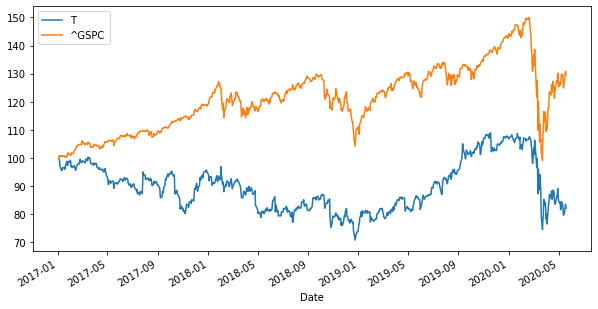

In [7]:
(pf_data/pf_data.iloc[0] * 100).plot(figsize=(10,5))

In [8]:
log_returns = np.log(pf_data/pf_data.shift(1))

In [9]:
# average
log_returns.mean() * 250

T       -0.058210
^GSPC    0.076026
dtype: float64

In [11]:
# covariance
log_returns.cov() * 250

,T,^GSPC
T,0.063396,0.034572
^GSPC,0.034572,0.043436


In [18]:
# correlation matrices
log_returns.corr()

,T,^GSPC
T,1.000000,0.658817
^GSPC,0.658817,1.000000


In [13]:
num_assets = len(assets)

In [14]:
#verify the number of assets
num_assets

2

In [19]:
arr = np.random.random(2)
arr

array([0.15698866, 0.53462088])

In [20]:
arr[0] + arr [1]

0.6916095409846569

In [21]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.76771149, 0.23228851])

In [22]:
weights[0] + weights[1]

1.0